Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   schlcode  2059 non-null   int32  
 1   c_size    2059 non-null   int16  
 2   c_boys    2059 non-null   int16  
 3   c_girls   2059 non-null   int16  
 4   c_numcl   2059 non-null   int8   
 5   c_pik     2059 non-null   int8   
 6   c_status  2059 non-null   int8   
 7   c_leom    2059 non-null   int8   
 8   c_tip     2059 non-null   object 
 9   c_num4rd  2059 non-null   int8   
 10  c_type    2059 non-null   int8   
 11  flgrm4    2025 non-null   float32
 12  mrkgrm4   2025 non-null   float64
 13  ngrm4     2025 non-null   float64
 14  flmth4    2025 non-null   float32
 15  mrkmth4   2025 non-null   float64
 16  nmth4     2025 non-null   float64
 17  towncode  2025 non-null   float64
 18  townname  2059 non-null   object 
 19  popcode   2025 non-null   float64
 20  tip_a     2025

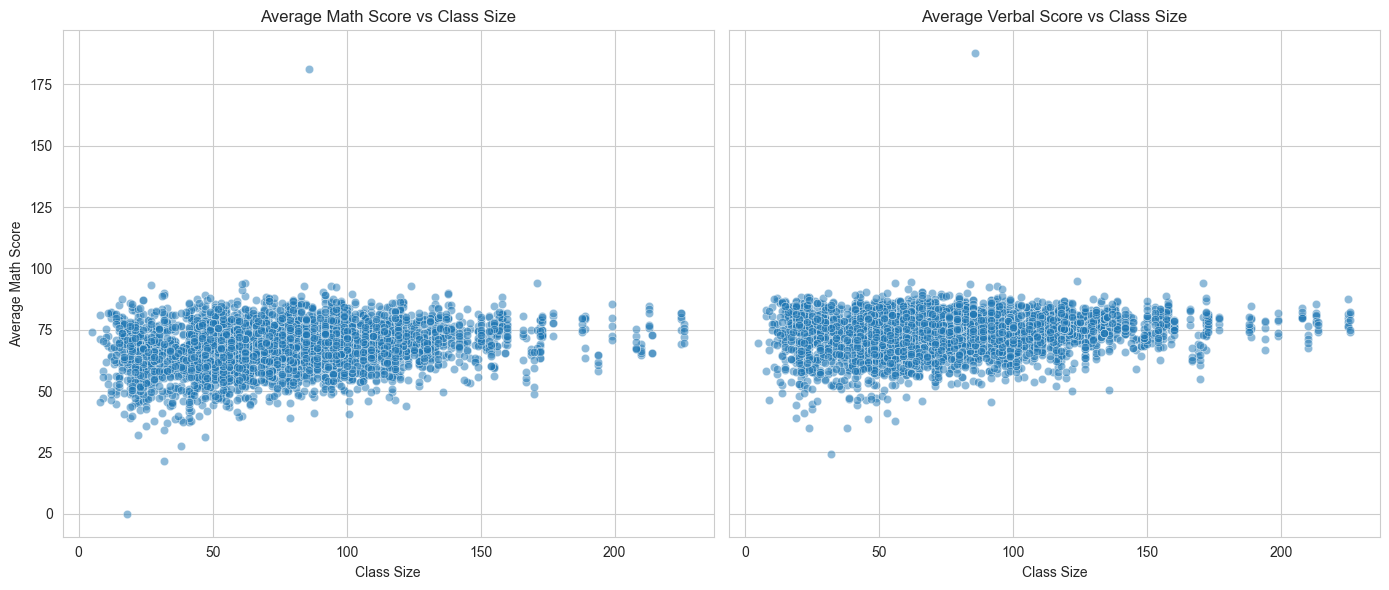

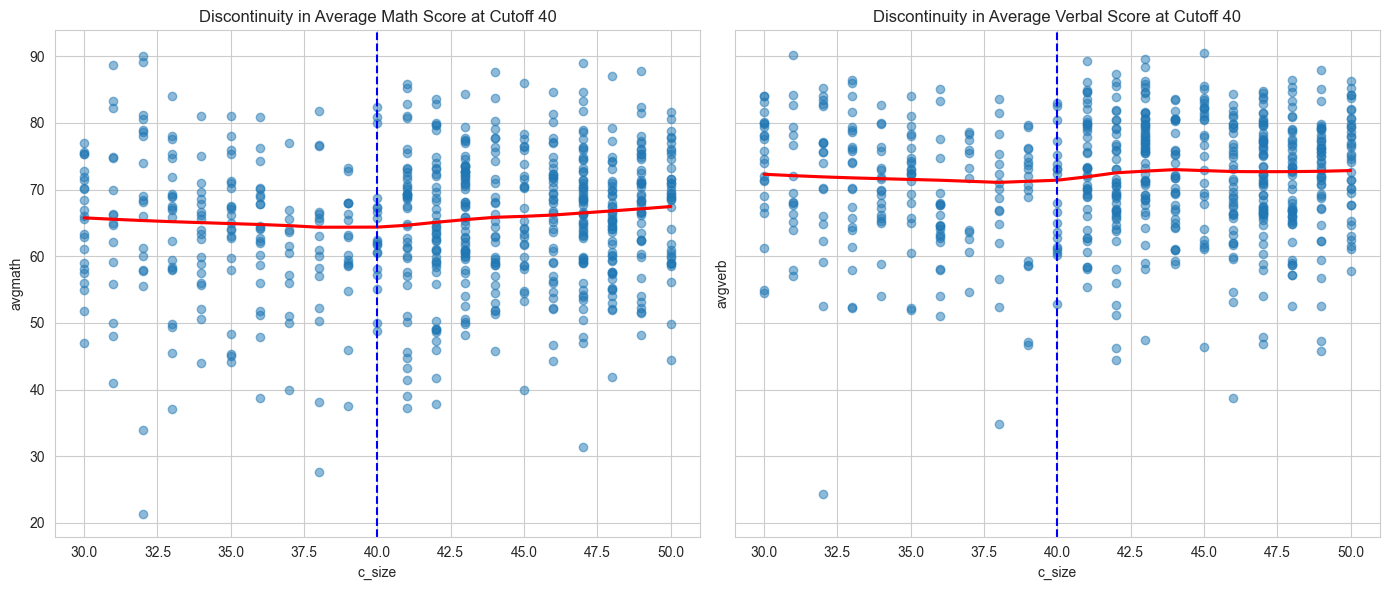

C:\Users\david\AppData\Local\Temp\ipykernel_11400\1902548851.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdd_data['treatment'] = np.where(rdd_data['c_size'] > 40, 1, 0)


                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.223
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0405
Time:                        08:42:57   Log-Likelihood:                -2411.3
No. Observations:                 644   AIC:                             4829.
Df Residuals:                     641   BIC:                             4842.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.5601      4.794     13.049      0.0

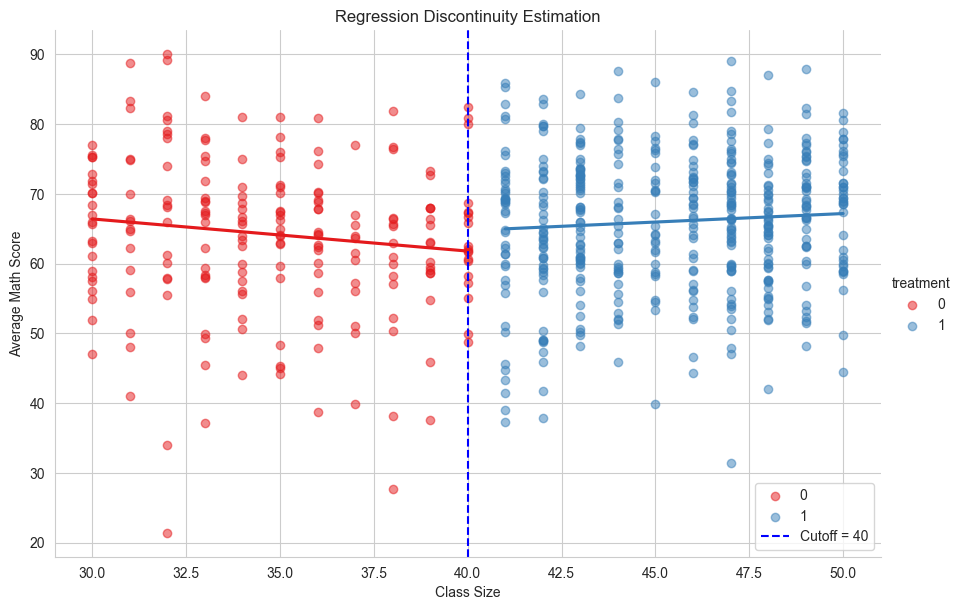

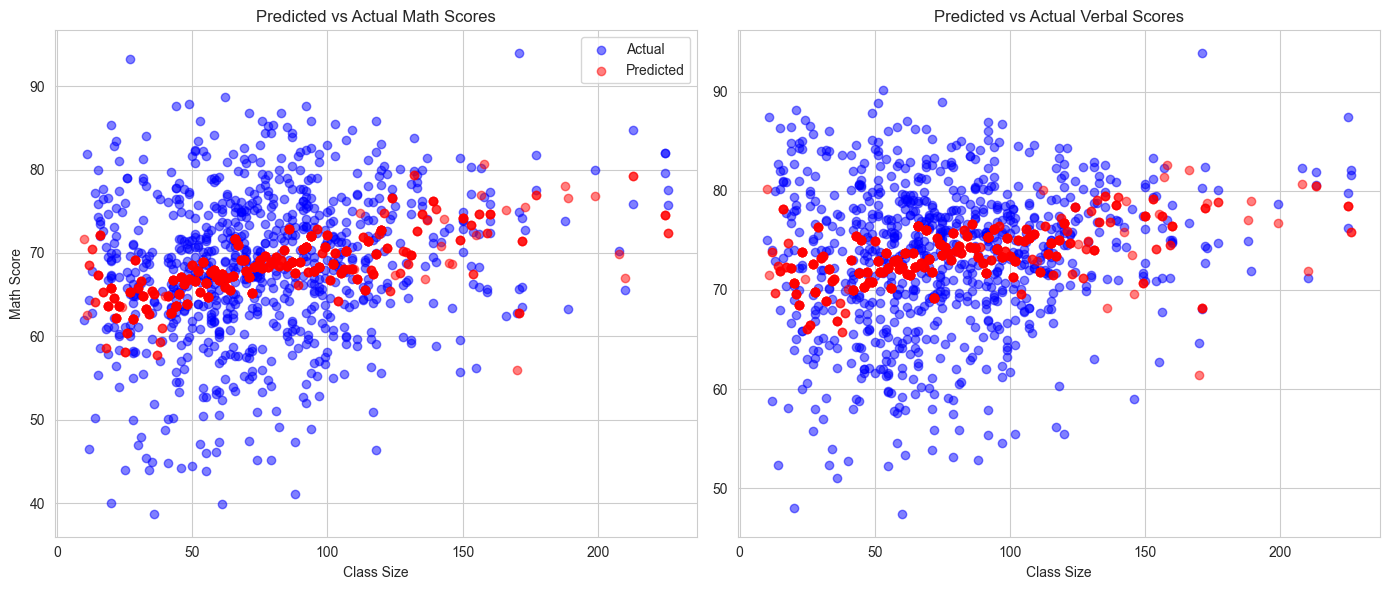

In [25]:

#PROMPT GIVEN TO CHAT GPT 4:
# Can you help me use the attached .dta files to replicate the results of the study attached in the pdf?
# All code used should be written in Python utilizing Jupyter Notebooks.
# Use necessary data clean and preprocessing steps and data visualization techniques. 
# After this, discuss potential machine learning methods 
# that could enhance the study's accuracy, and how these methods could be integrated into the study
# can you show me all the python code associated with the results




#Section 1: Data loading and inspecting:

import pandas as pd

# Load the .dta files for initial inspection
file_paths = [
    "final4.dta",
    "final5.dta"
]

# Read the data
dataframes = [pd.read_stata(path) for path in file_paths]

# Display basic information about each dataset for an overview
for i, df in enumerate(dataframes, start=1):
    print(f"Dataset {i} Info:")
    print(df.info(), "\n")
    print(f"First few rows of Dataset {i}:")
    print(df.head(), "\n\n")


#Section 2: Data Cleaning:

# Combine datasets for a unified analysis
combined_df = pd.concat(dataframes, ignore_index=True)

# Drop rows where critical variables have missing values
cleaned_df = combined_df.dropna(subset=['avgmath', 'avgverb', 'c_size'])

print(f"Shape of the cleaned dataframe: {cleaned_df.shape}")
cleaned_df.head()



#Section 3: Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure with two subplots (horizontally)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot average math score by class size
sns.scatterplot(ax=axes[0], data=cleaned_df, x='c_size', y='avgmath', alpha=0.5)
axes[0].set_title('Average Math Score vs Class Size')
axes[0].set_xlabel('Class Size')
axes[0].set_ylabel('Average Math Score')

# Plot average verbal score by class size
sns.scatterplot(ax=axes[1], data=cleaned_df, x='c_size', y='avgverb', alpha=0.5)
axes[1].set_title('Average Verbal Score vs Class Size')
axes[1].set_xlabel('Class Size')

plt.tight_layout()
plt.show()


#Section 4: Preparing for RDD analysis
# Filter data around the cutoff point for focused RDD analysis
rdd_data = cleaned_df[(cleaned_df['c_size'] >= 30) & (cleaned_df['c_size'] <= 50)]

# Visualize the discontinuity at the cutoff point
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting around the cutoff for Math and Verbal Scores
sns.regplot(ax=axes[0], x='c_size', y='avgmath', data=rdd_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'}, lowess=True)
axes[0].axvline(x=40, color='blue', linestyle='--')
axes[0].set_title('Discontinuity in Average Math Score at Cutoff 40')

sns.regplot(ax=axes[1], x='c_size', y='avgverb', data=rdd_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'}, lowess=True)
axes[1].axvline(x=40, color='blue', linestyle='--')
axes[1].set_title('Discontinuity in Average Verbal Score at Cutoff 40')

plt.tight_layout()
plt.show()


#Here, another propmt was given to chat GPT 4:
#Now can you show me more python code to replicate the study's results

#Section 5: RDD setup with Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Assuming 'rdd_data' is the DataFrame prepared for RDD analysis
# Create a binary indicator for treatment based on class size > 40
rdd_data['treatment'] = np.where(rdd_data['c_size'] > 40, 1, 0)

# Running a simple linear regression around the cutoff for demonstration
# This model does not fully implement RDD but illustrates how you might start approaching it
model = smf.ols('avgmath ~ c_size + treatment', data=rdd_data).fit()

# Print the summary of the regression model
print(model.summary())

#Section 6: Visualizing the RDD Estimation
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between class size and average math score
sns.lmplot(x='c_size', y='avgmath', hue='treatment', data=rdd_data, 
           ci=None, palette="Set1", height=6, aspect=1.5, robust=True, scatter_kws={'alpha':0.5})

plt.axvline(x=40, color='blue', linestyle='--', label='Cutoff = 40')
plt.title('Regression Discontinuity Estimation')
plt.xlabel('Class Size')
plt.ylabel('Average Math Score')
plt.legend()
plt.show()


#Section 7:  Integrating Machine Learning Methods
from sklearn.ensemble import RandomForestRegressor

# Define the feature matrix X and the target variable y
X = rdd_data[['c_size', 'treatment']]  # Plus other covariates as needed
y = rdd_data['avgmath']

# Initialize and fit the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predictions can be used to examine the non-linear effects and importance of features
predictions = rf.predict(X)

#Here, yet another prompt was given to chat GPT:
#can you make some kind of plot with the machine learning section?

#Section 8: Visualizing Machine Learning techniques
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature selection
X = cleaned_df[['c_size']]  # Using class size as the sole feature for simplicity
y_math = cleaned_df['avgmath']  # Target variable for math scores
y_verb = cleaned_df['avgverb']  # Target variable for verbal scores

# Splitting data into training and testing sets for both targets
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train_verb, X_test_verb, y_train_verb, y_test_verb = train_test_split(X, y_verb, test_size=0.2, random_state=42)

# Model training for math scores
rf_math = RandomForestRegressor(n_estimators=100, random_state=42)
rf_math.fit(X_train_math, y_train_math)

# Prediction for math scores
y_pred_math = rf_math.predict(X_test_math)

# Model training for verbal scores
rf_verb = RandomForestRegressor(n_estimators=100, random_state=42)
rf_verb.fit(X_train_verb, y_train_verb)

# Prediction for verbal scores
y_pred_verb = rf_verb.predict(X_test_verb)

# Visualization of predictions vs. class size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for math scores
axes[0].scatter(X_test_math, y_test_math, color='blue', label='Actual', alpha=0.5)
axes[0].scatter(X_test_math, y_pred_math, color='red', label='Predicted', alpha=0.5)
axes[0].set_title('Predicted vs Actual Math Scores')
axes[0].set_xlabel('Class Size')
axes[0].set_ylabel('Math Score')
axes[0].legend()

# Plot for verbal scores
axes[1].scatter(X_test_verb, y_test_verb, color='blue', label='Actual', alpha=0.5)
axes[1].scatter(X_test_verb, y_pred_verb, color='red', label='Predicted', alpha=0.5)
axes[1].set_title('Predicted vs Actual Verbal Scores')
axes[1].set_xlabel('Class Size')

plt.tight_layout()
plt.show()